In [84]:
library(tidyverse)
titanic <- read.csv("titanic.csv", header = TRUE, sep = ',')
head(titanic)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


Survived,Pclass,Name,Sex,Age,Siblings.Spouses.Aboard,Parents.Children.Aboard,Fare
0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000
0,3,Mr. William Henry Allen,male,35,0,0,8.0500
0,3,Mr. James Moran,male,27,0,0,8.4583


In [213]:
# Ubah numerical values menjadi categorical
titanic1 <- titanic %>%  
    mutate(Survived = ifelse(Survived == 0, "No", "Yes")) %>% 
    mutate(Age_class = ifelse(Age >= 17.0, "Adult", "Children" ))

titanic1$Pclass = as.factor(titanic1$Pclass)

In [216]:
str(titanic1)
head(titanic1)

'data.frame':	887 obs. of  9 variables:
 $ Survived               : chr  "No" "Yes" "Yes" "Yes" ...
 $ Pclass                 : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name                   : Factor w/ 887 levels "Capt. Edward Gifford Crosby",..: 602 823 172 814 733 464 700 33 842 839 ...
 $ Sex                    : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age                    : num  22 38 26 35 35 27 54 2 27 14 ...
 $ Siblings.Spouses.Aboard: int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parents.Children.Aboard: int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare                   : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Age_class              : chr  "Adult" "Adult" "Adult" "Adult" ...


Survived,Pclass,Name,Sex,Age,Siblings.Spouses.Aboard,Parents.Children.Aboard,Fare,Age_class
No,3,Mr. Owen Harris Braund,male,22,1,0,7.2500,Adult
Yes,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833,Adult
Yes,3,Miss. Laina Heikkinen,female,26,0,0,7.9250,Adult
Yes,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000,Adult
No,3,Mr. William Henry Allen,male,35,0,0,8.0500,Adult
No,3,Mr. James Moran,male,27,0,0,8.4583,Adult


Survived,n,persen,label
No,545,0.6144307,61.4%
Yes,342,0.3855693,38.6%


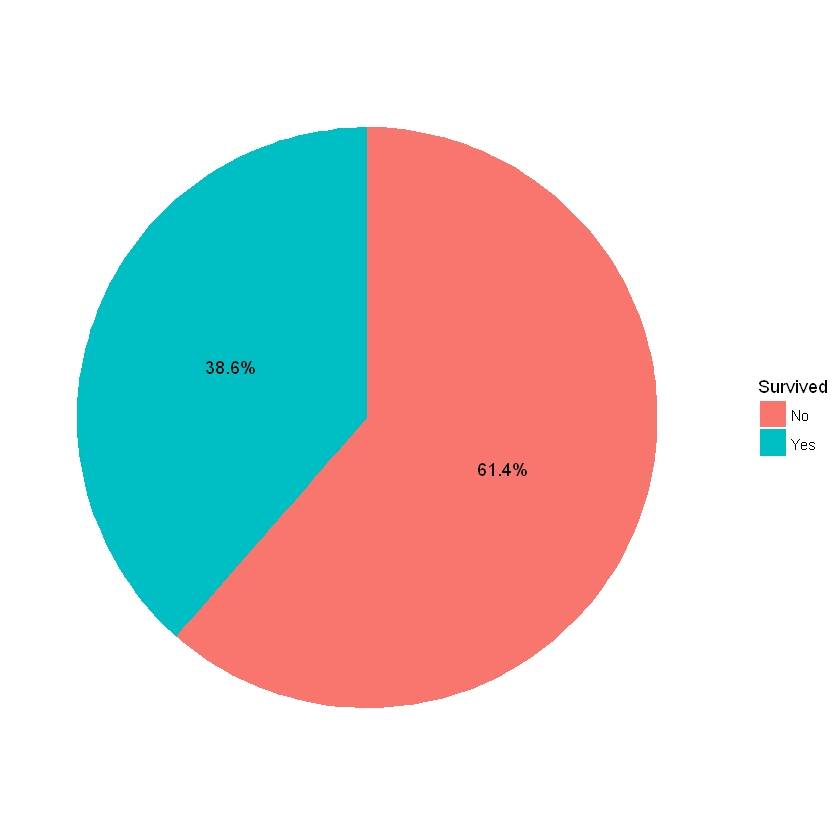

In [207]:
survived_table <- titanic1  %>%
    count(Survived) %>%
    mutate(persen = n/sum(n))
survived_table$label <- scales::percent(survived_table$persen)
survived_table[order(survived_table$n, decreasing = TRUE), ]
ggplot(data=survived_table[order(survived_table$n), ])+
  geom_bar(aes(x="", y=persen, fill=Survived), stat="identity", width = 1)+
  coord_polar("y", start=0, direction = -1)+
  theme_void()+
  geom_text(aes(x=1, y = cumsum(persen) - persen/2, label=label))

Sex,n,persen,label
female,314,0.3540023,35.4%
male,573,0.6459977,64.6%


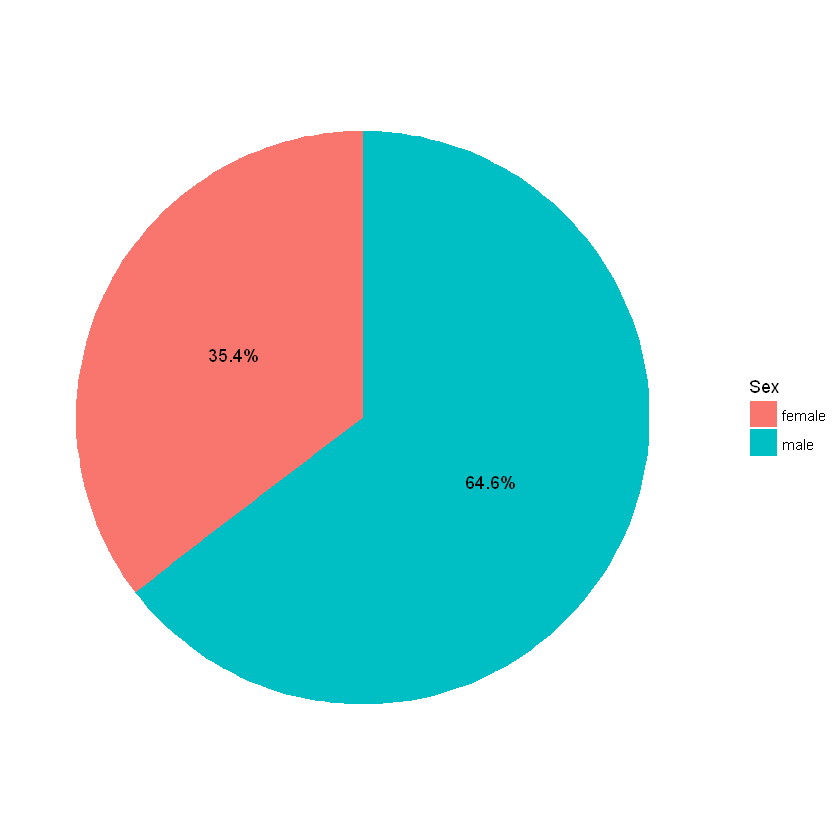

In [267]:
sex <- titanic1  %>%
    count(Sex) %>%
    mutate(persen = n/sum(n))
sex$label <- scales::percent(sex$persen)
sex
ggplot(data=sex[order(sex$n, decreasing = TRUE), ])+
  geom_bar(aes(x="", y=persen, fill=Sex), stat="identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(x=1, y = cumsum(persen) - persen/2, label=label))

Pclass,n,persen,label
3,487,0.5490417,54.9%
1,216,0.2435175,24.4%
2,184,0.2074408,20.7%


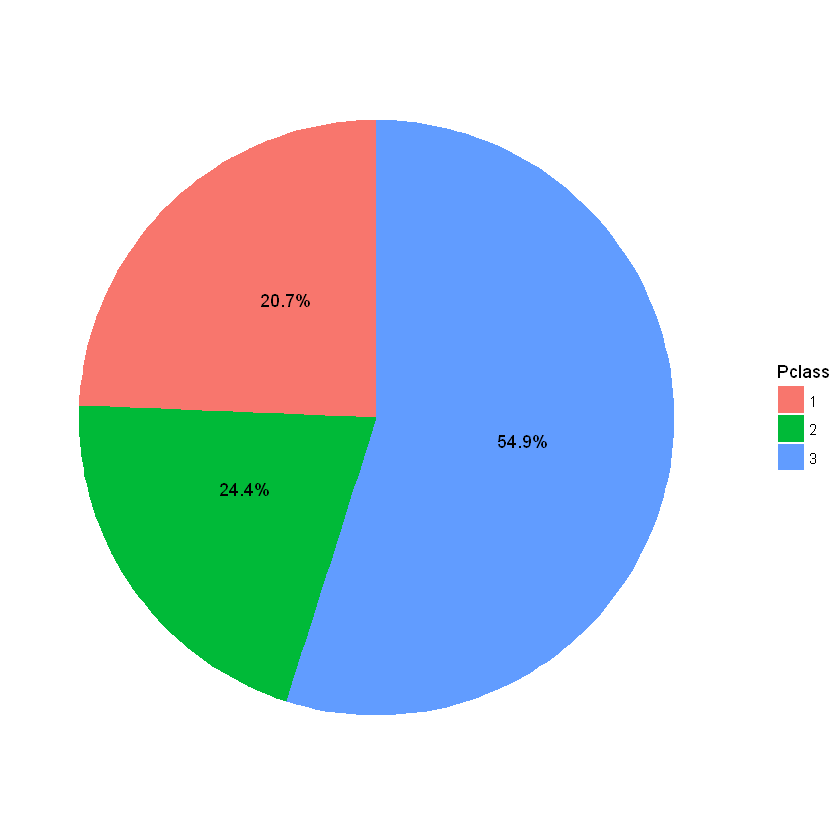

In [203]:
pclass <- titanic1  %>%
    count(Pclass) %>%
    mutate(persen = n/sum(n))
pclass$label <- scales::percent(pclass$persen)
pclass[order(pclass$n, decreasing = TRUE), ]
ggplot(data=pclass[order(pclass$n, decreasing = TRUE), ])+
  geom_bar(aes(x="", y=persen, fill=Pclass), stat="identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(x=1, y = cumsum(persen) - persen/2, label=label))

Sex,Survived,n,persen
female,No,81,25.79618
female,Yes,233,74.20382
male,No,464,80.97731
male,Yes,109,19.02269


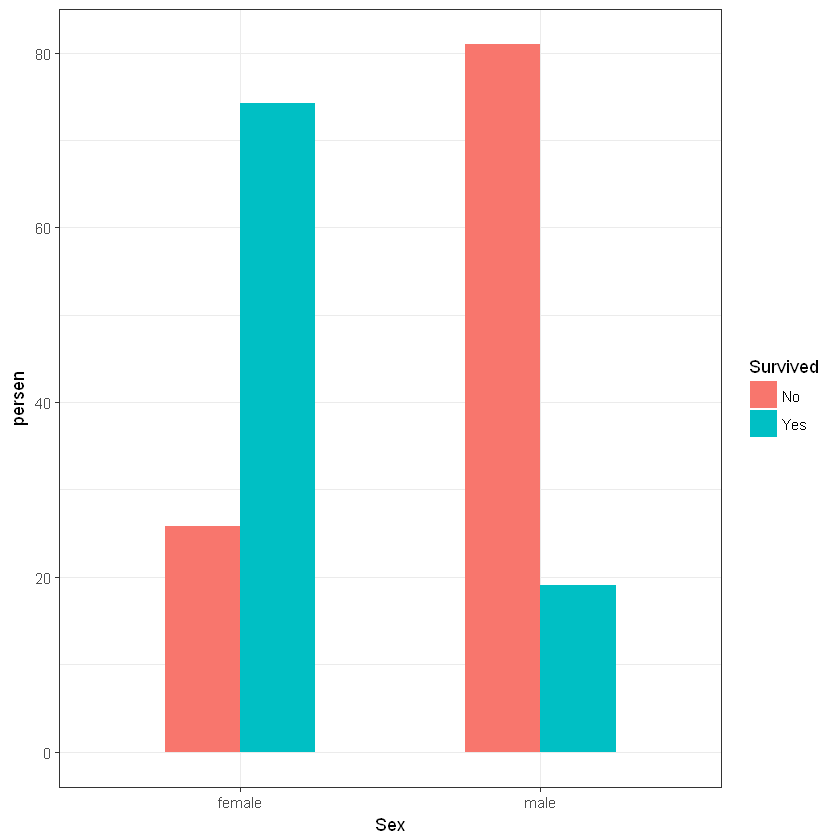

In [269]:
tabel_sex_survived <- titanic1 %>%
    count(Sex,Survived) %>%
    group_by(Sex) %>%
    mutate(persen = 100*n/sum(n))
tabel_sex_survived
ggplot(tabel_sex_survived, aes(x = Sex, y = persen, fill = Survived)) +
    theme_bw() +
    geom_bar(stat="identity", width=.5, position = "dodge")

Pclass,Survived,n,persen
1,No,80,37.03704
1,Yes,136,62.96296
2,No,97,52.71739
2,Yes,87,47.28261
3,No,368,75.56468
3,Yes,119,24.43532


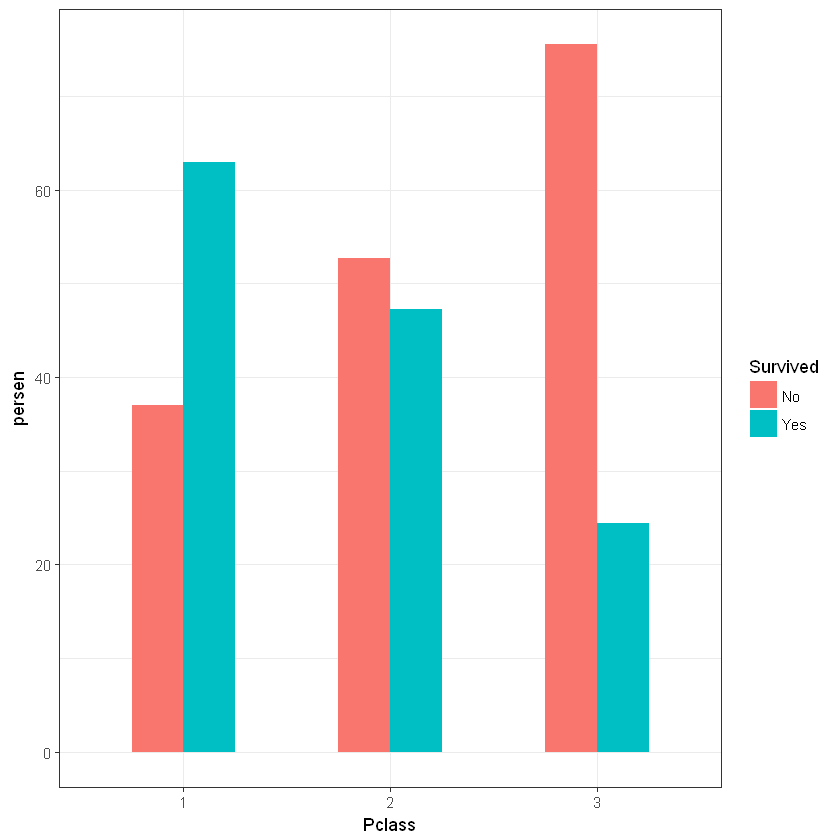

In [270]:
tabel_class_survived <- titanic1 %>%
    count(Pclass,Survived) %>%
    group_by(Pclass) %>%
    mutate(persen = 100*n/sum(n))
tabel_class_survived
ggplot(tabel_class_survived, aes(x = Pclass, y = persen, fill = Survived)) +
    theme_bw() +
    geom_bar(stat="identity", width=.5, position = "dodge")

Age_class,Survived,n,persen
Adult,No,490,63.38939
Adult,Yes,283,36.61061
Children,No,55,48.24561
Children,Yes,59,51.75439


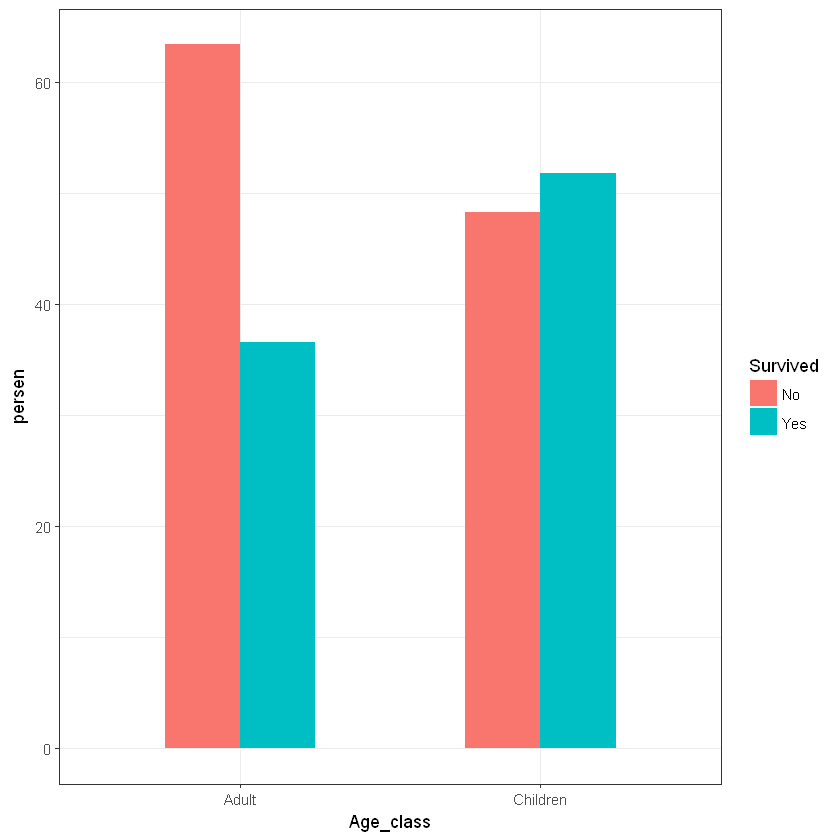

In [259]:
tabel_age_survived <- titanic1 %>%
    count(Age_class,Survived) %>%
    group_by(Age_class) %>%
    mutate(persen = 100*n/sum(n))
tabel_age_survived
ggplot(tabel_age_survived, aes(x = Age_class, y = persen, fill = Survived)) +
    theme_bw() +
    geom_bar(stat="identity", width=.5, position = "dodge")

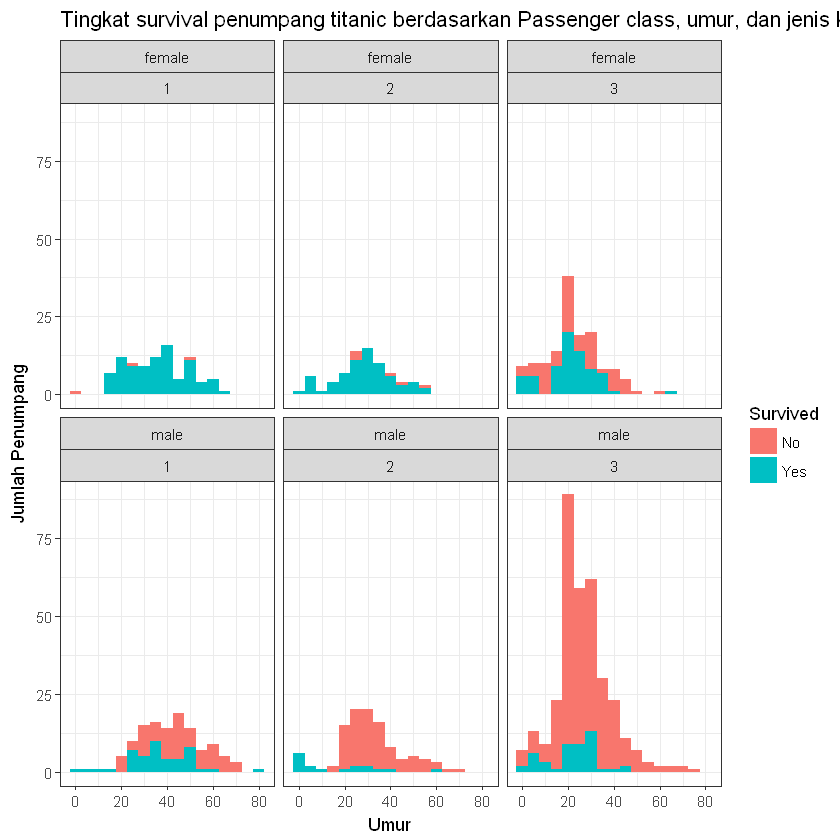

In [224]:
ggplot(titanic1, aes(x = Age, fill = Survived)) +
    theme_bw() +
    facet_wrap(Sex ~ Pclass) +
    geom_histogram(binwidth = 5) +
    labs(y = "Jumlah Penumpang", x = "Umur", 
         title = "Tingkat survival penumpang titanic berdasarkan Passenger class, umur, dan jenis kelamin")

In [231]:
titanic1$Family <- titanic1$Siblings.Spouses.Aboard+titanic1$Parents.Children.Aboard
head(titanic1)

Survived,Pclass,Name,Sex,Age,Siblings.Spouses.Aboard,Parents.Children.Aboard,Fare,Age_class,Family
No,3,Mr. Owen Harris Braund,male,22,1,0,7.2500,Adult,1
Yes,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833,Adult,1
Yes,3,Miss. Laina Heikkinen,female,26,0,0,7.9250,Adult,0
Yes,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000,Adult,1
No,3,Mr. William Henry Allen,male,35,0,0,8.0500,Adult,0
No,3,Mr. James Moran,male,27,0,0,8.4583,Adult,0


Family,n,persen,label
0,533,0.600901917,60.1%
1,161,0.181510710,18.2%
2,102,0.114994363,11.5%
3,29,0.032694476,3.3%
4,15,0.016910936,1.7%
5,22,0.024802706,2.5%
6,12,0.013528749,1.4%
7,6,0.006764374,0.7%
10,7,0.007891770,0.8%


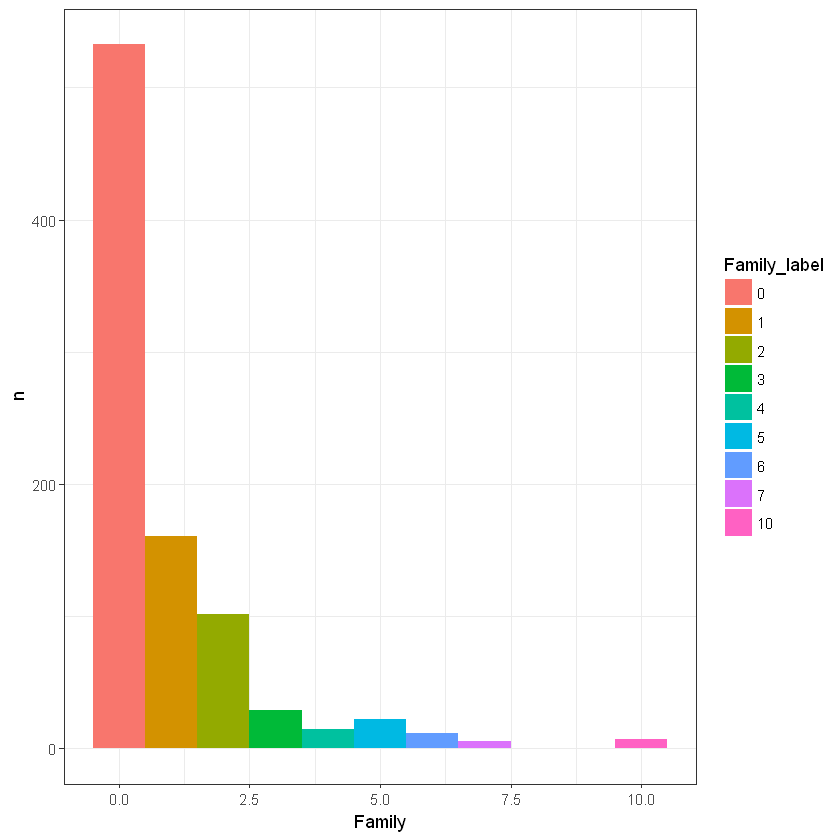

In [261]:
tabel_fam = titanic1 %>%
    count(Family) %>%
    mutate(persen = n/sum(n))
tabel_fam$label <- scales::percent(tabel_fam$persen)
tabel_fam
Family_label <- factor(tabel_fam$Family)
ggplot(data=tabel_fam)+
    geom_bar(aes(x=Family, y=n, fill=Family_label), stat="identity", width = 1)+
    theme_bw() 

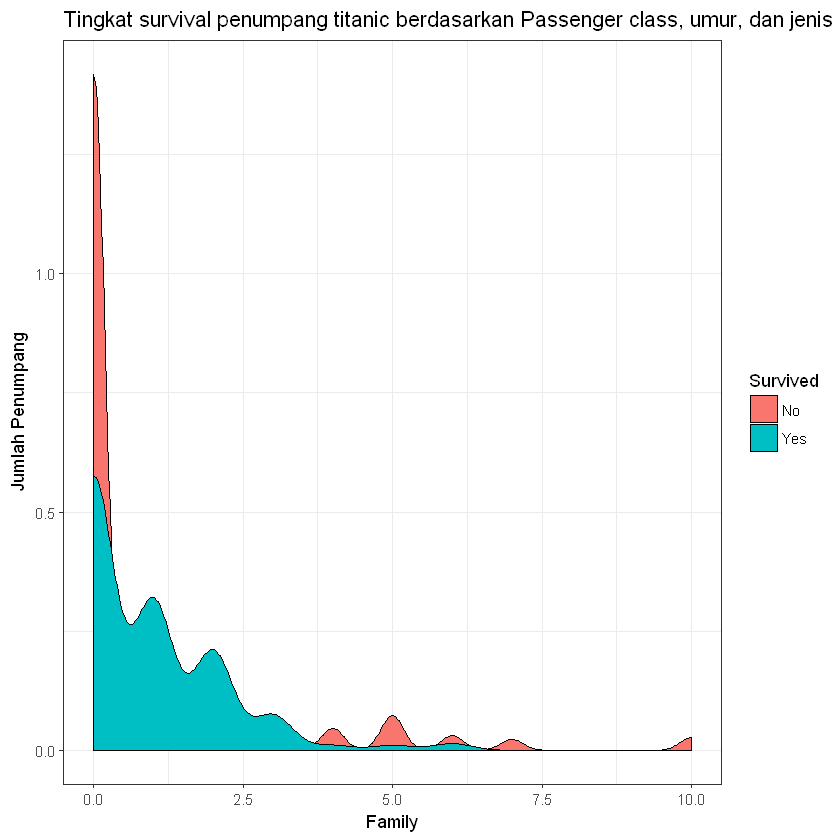

In [262]:
# titanic1
ggplot(titanic1, aes(x = Family,fill=Survived)) +
    theme_bw() +
    geom_density() +
    labs(y = "Jumlah Penumpang", x = "Family", 
         title = "Tingkat survival penumpang titanic berdasarkan Passenger class, umur, dan jenis kelamin")

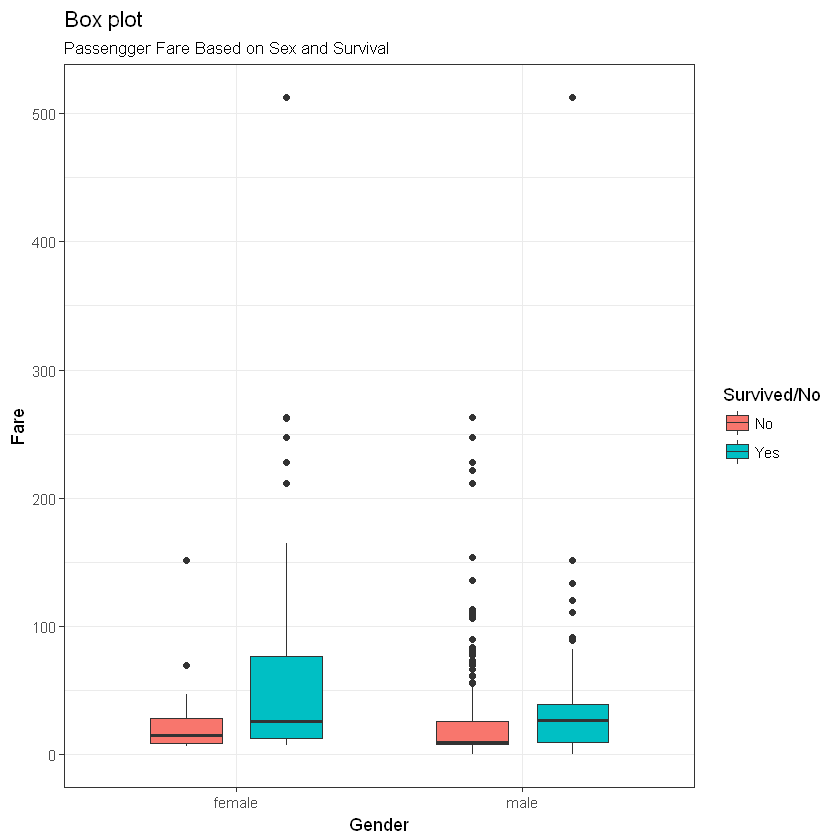

In [263]:
box_plot <- ggplot(titanic1, aes(titanic1$Sex, titanic1$Fare))
box_plot + geom_boxplot(aes(fill=factor(titanic1$Survived)), width = 0.5,
                  position = position_dodge(width = 0.7)) + 
  labs(title="Box plot", 
       subtitle="Passengger Fare Based on Sex and Survival",
       x="Gender",
       y="Fare",
       fill="Survived/No")+theme_bw() 

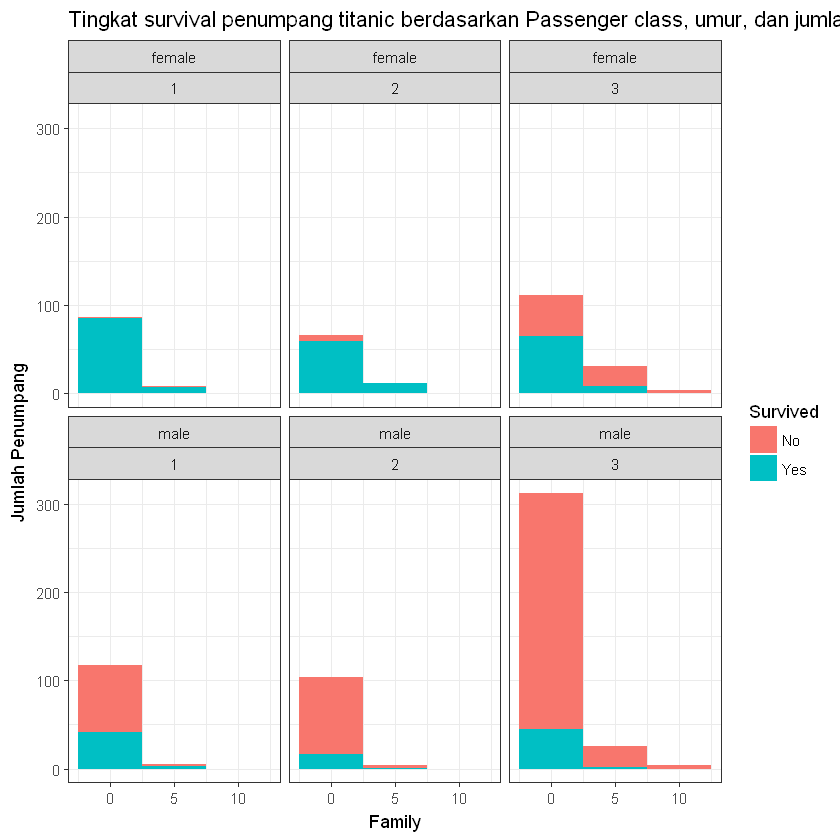

In [251]:
ggplot(titanic1, aes(x = Family, fill = Survived)) +
    theme_bw() +
    facet_wrap(Sex ~ Pclass) +
    geom_histogram(binwidth = 5) +
    labs(y = "Jumlah Penumpang", x = "Family", 
         title = "Tingkat survival penumpang titanic berdasarkan Passenger class, umur, dan jumlah keluarga")

In [248]:
# Split data
titanic_survived = filter(titanic1, Survived == "Yes")
titanic_not_survived = filter(titanic1, Survived == "No")

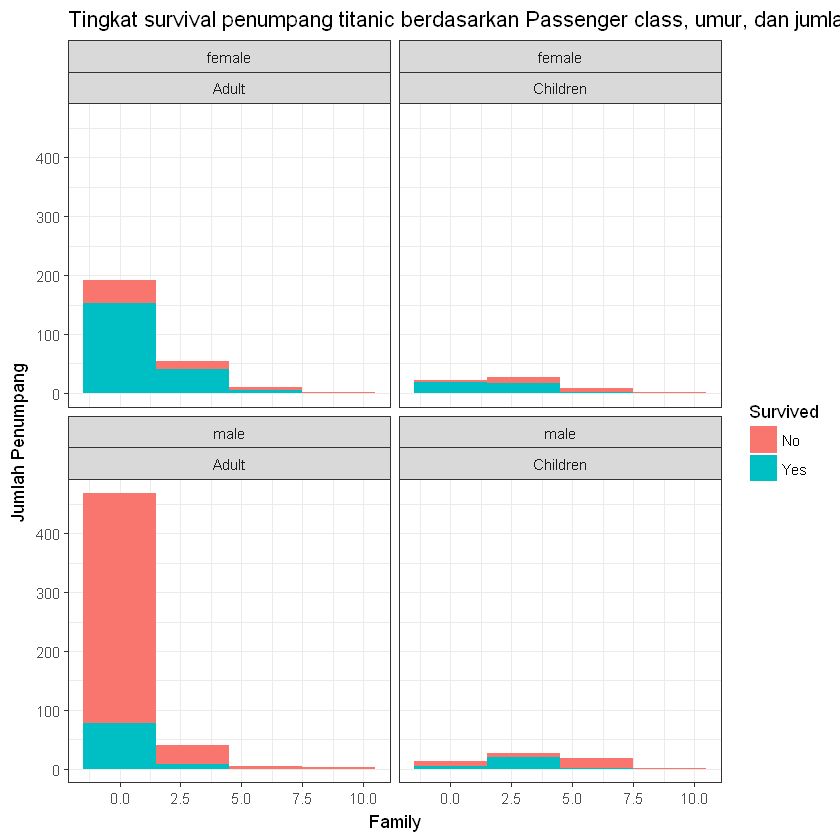

In [257]:
ggplot(titanic1, aes(x = Family, fill = Survived)) +
    theme_bw() +
    facet_wrap(Sex ~ Age_class) +
    geom_histogram(binwidth = 3) +
    labs(y = "Jumlah Penumpang", x = "Family", 
         title = "Tingkat survival penumpang titanic berdasarkan Passenger class, umur, dan jumlah keluarga")